<a href="https://colab.research.google.com/github/kashishgidwani/Predicting-the-probability-of-default-in-credit-scoring/blob/main/EDA_J_component.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas: Data analysis and manipulation,visualization,analysis and modeling

NumPy: Powerful N-dimensional array object,tools for interating C/C++ and fortran code

Matplotlib.pyplot: 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments

Seaborn: Built on top of Matplotlib and
Provides a high-level interface for drawing attractive and informative statistical graphics

Plotnine: Grammar of graphics for Python
which Provides a consistent and easy-to-use interface for creating a wide variety of plots

ggplot, aes, geom_violin, facet_wrap, theme_bw:

ggplot is the main function in Plotnine for creating a plot.
aes is used to map data to aesthetic attributes of the plot.
geom_violin is used to create violin plots
facet_wrap is used to create multiple plots, each with a different subset of the data.
theme_bw is used to set the theme of the plot to black and white.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_violin, facet_wrap, theme_bw
#(pandas,numpy,matplot,seaborn,plotnine,ggplot, aes, geom_violin, facet_wrap, theme_bw)
#These are the libraries and packages to be performed

In [3]:
train = pd.read_csv('/cs-training.csv')
#To read the file. File can be of any type,just mention the file type after the read statement.

In [4]:
train.isna().sum()


Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select the columns to impute
cols_to_impute = ['MonthlyIncome', 'NumberOfDependents']

# Create an instance of IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=42)

# Fit and transform the data
imputed_data = imputer.fit_transform(train[cols_to_impute])

# Convert the imputed data back to a dataframe
imputed_df = pd.DataFrame(imputed_data, columns=cols_to_impute)

# Replace the original columns with the imputed data
train[cols_to_impute] = imputed_df

astypr(int) to change the data type of a pandas Series or DataFrame column.

In [6]:
train['NumberOfDependents'] = train['NumberOfDependents'].astype(int)
#converting the data type of the 'NumberOfDependents' column in the DataFrame 'train' to integer

drop() method is used to remove rows from a DataFrame based on their indices.

inplace=True parameter ensures that the changes are made directly to the original DataFrame

Note:Bank can Grant Loan To a Person who has Age Above 18,and usually perosn before his Retirementso adding a age restriction to data

In [7]:
indexNames = train[train['age'] < 18].index
#creates an index of rows where the 'age' column in the DataFrame 'train' is less than 18(boolean indexing is used)
train.drop(index=indexNames , inplace=True)
#drops the rows with the indices specified in the 'indexNames' variable from the DataFrame 'train'.
indexNames = train[train['age'] > 60].index
#creates an index of rows where the 'age' column in the DataFrame 'train' is greater than 60
train.drop(index=indexNames , inplace=True)
#drops the rows with the indices specified in the 'indexNames' variable from the DataFrame 'train', similar to the previous line


**Comparing Relationship of Output with each** **data** **column**



<ipython-input-77-d36dae451935>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


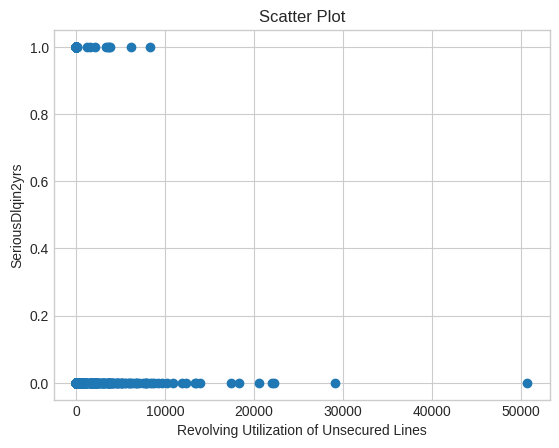

In [ ]:
plt.style.use("seaborn-whitegrid")
#sets the style of the plot to "seaborn-whitegrid" using use() function.
plt.scatter(train['RevolvingUtilizationOfUnsecuredLines'], train['SeriousDlqin2yrs'])
#creates a scatter plot using the 'RevolvingUtilizationOfUnsecuredLines' column as the x-axis values and the 'SeriousDlqin2yrs' column as the y-axis values
#using scatter() function
plt.xlabel('Revolving Utilization of Unsecured Lines')
#sets the label for the x-axis of the plot to 'Revolving Utilization of Unsecured Lines' using the xlabel() function.
plt.ylabel('SeriousDlqin2yrs')
#sets the label for the y-axis of the plot to 'SeriousDlqin2yrs' using the ylabel() function.
plt.title('Scatter Plot')
#sets the title of the plot to 'Scatter Plot' using the title() function.
plt.show()
#displays the scatter plot on the screen

<ipython-input-21-80261816ab57>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


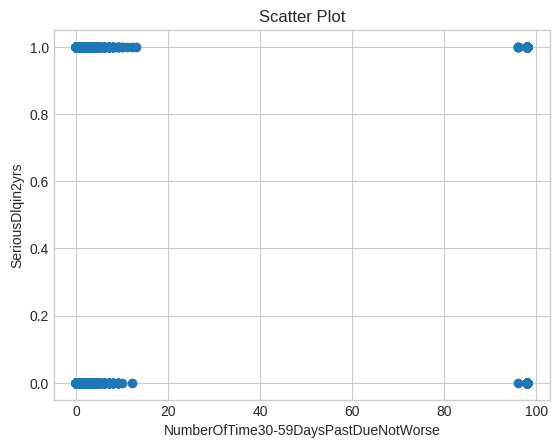

In [ ]:
plt.style.use("seaborn-whitegrid")
#sets the style of the plot to "seaborn-whitegrid" using use() function.
plt.scatter(train['NumberOfTime30-59DaysPastDueNotWorse'], train['SeriousDlqin2yrs'])
#creates a scatter plot using the 'NumberOfTime30-59DaysPastDueNotWorse' column as the x-axis values and the 'SeriousDlqin2yrs' column as the y-axis values from the DataFrame 'train'
#using scatter() function.
plt.xlabel('NumberOfTime30-59DaysPastDueNotWorse')
#sets the label for the x-axis of the plot to 'NumberOfTime30-59DaysPastDueNotWorse' using the xlabel()
plt.ylabel('SeriousDlqin2yrs')
# sets the label for the y-axis of the plot to 'SeriousDlqin2yrs' using the ylabel() function
plt.title('Scatter Plot')
#sets the title of the plot to 'Scatter Plot' using the title() function.
plt.show()
#displays on the screen

<ipython-input-22-52b43abc8aee>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


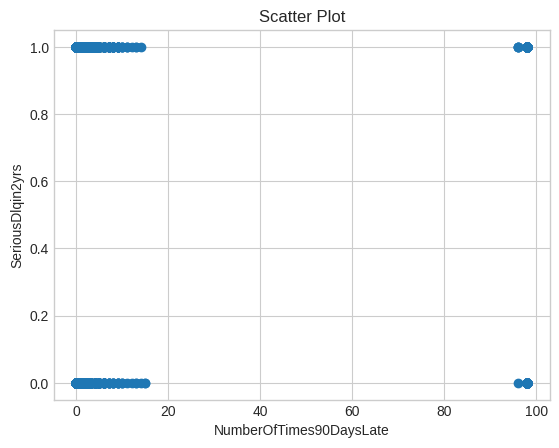

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.scatter(train['NumberOfTimes90DaysLate'], train['SeriousDlqin2yrs'])
plt.xlabel('NumberOfTimes90DaysLate')
plt.ylabel('SeriousDlqin2yrs')
plt.title('Scatter Plot')
plt.show()

<ipython-input-23-e5de493fa759>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


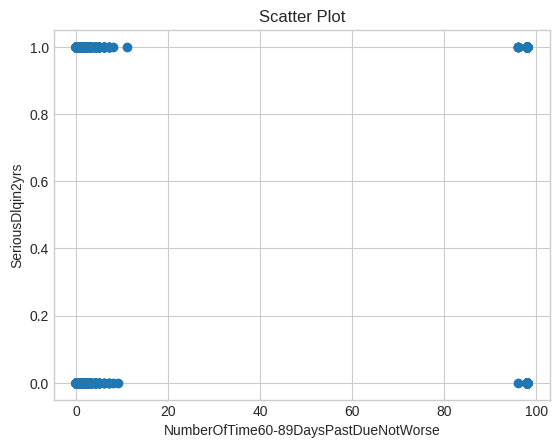

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.scatter(train['NumberOfTime60-89DaysPastDueNotWorse'], train['SeriousDlqin2yrs'])
plt.xlabel('NumberOfTime60-89DaysPastDueNotWorse')
plt.ylabel('SeriousDlqin2yrs')
plt.title('Scatter Plot')
plt.show()

<ipython-input-24-cc5e073895a3>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


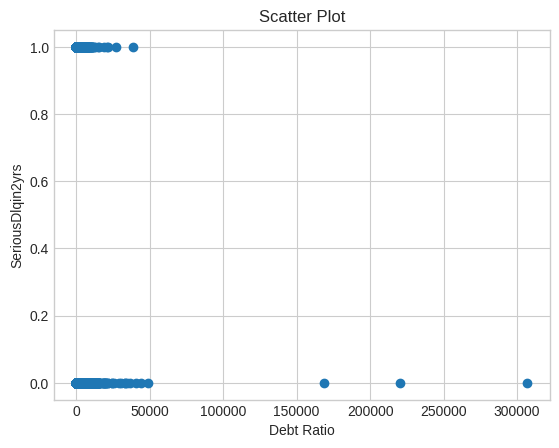

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.scatter(train['DebtRatio'], train['SeriousDlqin2yrs'])
plt.xlabel('Debt Ratio')
plt.ylabel('SeriousDlqin2yrs')
plt.title('Scatter Plot')
plt.show()

<ipython-input-25-b80734345e31>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


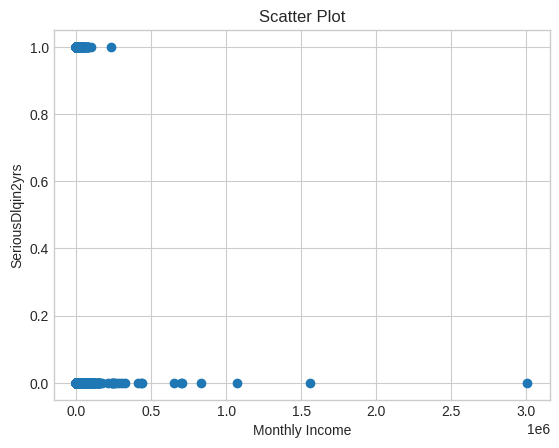

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.scatter(train['MonthlyIncome'], train['SeriousDlqin2yrs'])
plt.xlabel('Monthly Income')
plt.ylabel('SeriousDlqin2yrs')
plt.title('Scatter Plot')
plt.show()

There is a concentration of data points around the 4k-8K monthly income range. This suggests that majority of the individuals in this sample have a monthly income between 4k and 8k. Additionally, based on the target variable (SeriousDlqin2yrs), it can be observed that most individuals did not experience serious delinquency in two years.

This is derived from the visual pattern in the scatter plot, where the majority of data points are clustered around a specific income range, and there are relatively fewer data points indicating serious delinquency. It implies that there is a potential correlation between monthly income and the likelihood of serious delinquency, with higher incomes associated with a lower risk of delinquency

<ipython-input-26-142f155b2511>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


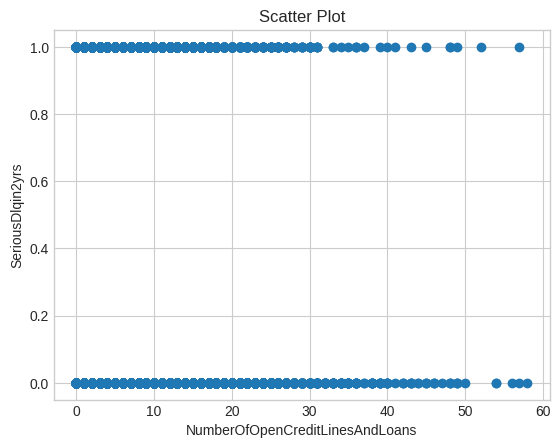

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.scatter(train['NumberOfOpenCreditLinesAndLoans'], train['SeriousDlqin2yrs'])
plt.xlabel('NumberOfOpenCreditLinesAndLoans')
plt.ylabel('SeriousDlqin2yrs')
plt.title('Scatter Plot')
plt.show()

<ipython-input-27-d15204b17d13>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


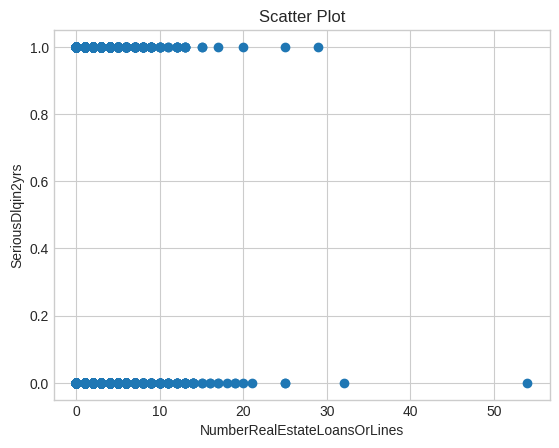

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.scatter(train['NumberRealEstateLoansOrLines'], train['SeriousDlqin2yrs'])
plt.xlabel('NumberRealEstateLoansOrLines')
plt.ylabel('SeriousDlqin2yrs')
plt.title('Scatter Plot')
plt.show()

<ipython-input-28-552dabd8c974>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


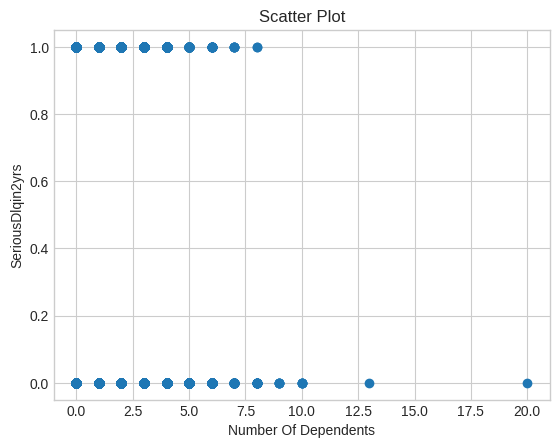

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.scatter(train['NumberOfDependents'], train['SeriousDlqin2yrs'])
plt.xlabel('Number Of Dependents')
plt.ylabel('SeriousDlqin2yrs')
plt.title('Scatter Plot')
plt.show()

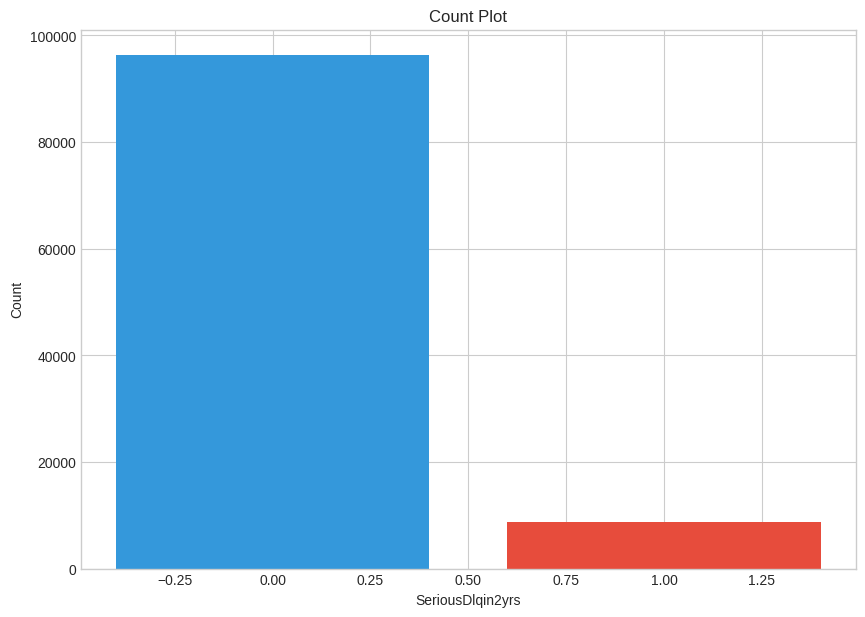

In [ ]:
colors = ['#3498db', '#e74c3c']
plt.figure(figsize=(10, 7))
plt.bar(train['SeriousDlqin2yrs'].value_counts().index, train['SeriousDlqin2yrs'].value_counts().values,color=colors)
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('Count')
plt.title('Count Plot')
plt.show()

A correlation heatmap by visualizing the correlation matrix of the 'train' DataFrame. The heatmap provides a visual representation of the correlation values between different columns, with darker shades indicating stronger positive correlation and lighter shades indicating weaker or negative correlation.

In [8]:
#CFS(correlation based feauture slelection) taking SeriousDlqin2yrs as target variable

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from scipy.stats import ttest_ind


# Define the target variable
target = 'SeriousDlqin2yrs'

# Select the features
X = train.drop(target, axis=1)
y = train[target]

# Perform CFS
selector = SelectKBest(f_regression, k=3)
X_selected = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]

# Print the 3 most related features
print("3 most related features:", selected_features)

# Perform t-test on the selected features
for feature in selected_features:
  # Split the data based on the target variable
  X1 = X[y == 0][feature]
  X2 = X[y == 1][feature]

  # Perform the t-test
  t_statistic, p_value = ttest_ind(X1, X2)

  # Print the results
  print(f"T-test for feature '{feature}':")
  print(f"t-statistic: {t_statistic:.4f}")
  print(f"p-value: {p_value:.4f}")



3 most related features: Index(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')
T-test for feature 'NumberOfTime30-59DaysPastDueNotWorse':
t-statistic: -39.8528
p-value: 0.0000
T-test for feature 'NumberOfTimes90DaysLate':
t-statistic: -37.8260
p-value: 0.0000
T-test for feature 'NumberOfTime60-89DaysPastDueNotWorse':
t-statistic: -33.0272
p-value: 0.0000


The correlation between the variables NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, and NumberOfTimes90DaysLate with the response variable SeriousDlqin2yrs suggests that these variables are important indicators of the likelihood of experiencing serious delinquency in the next two years. These variables likely represent the number of times an individual has been past due on their payments within specific time ranges, indicating a history of payment difficulties. A higher value in these variables suggests a higher risk of serious delinquency.




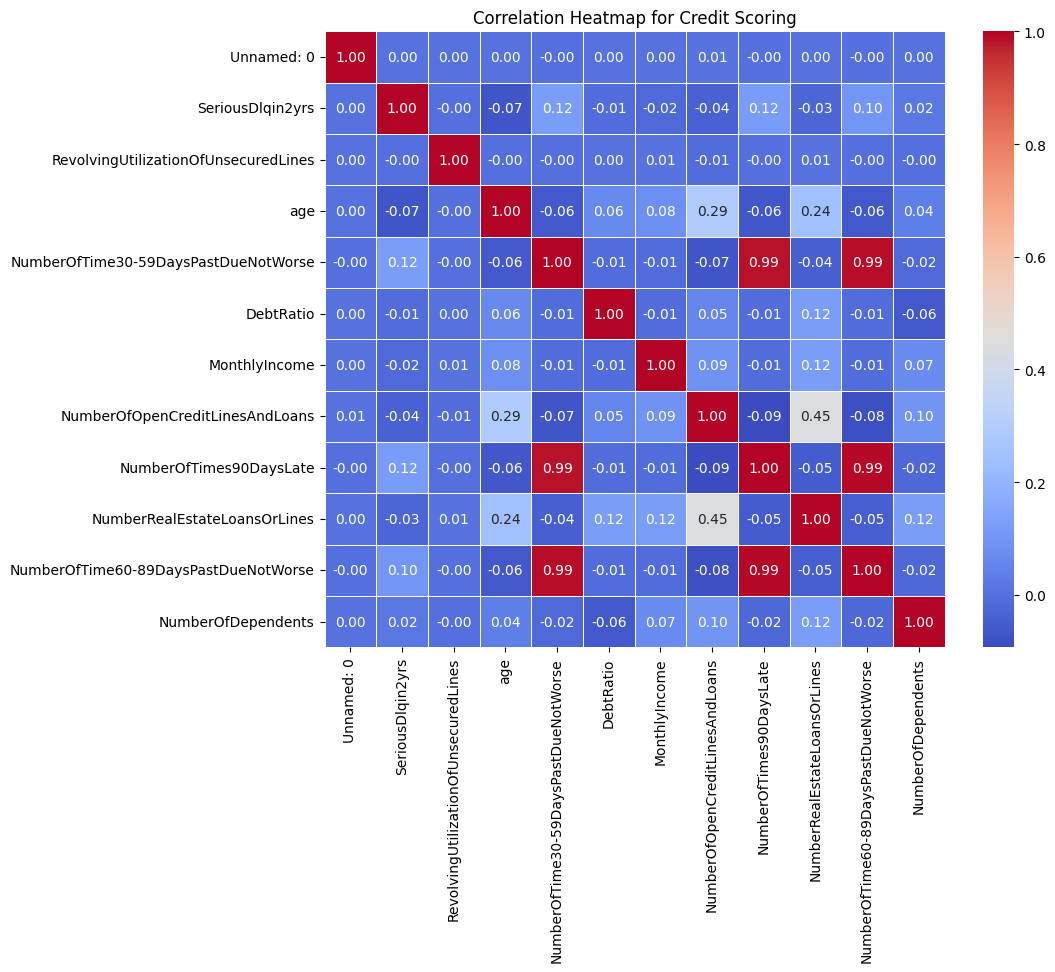

In [9]:

# Compute correlation matrix
corr_matrix = train.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Credit Scoring')
plt.show()



In [10]:
train = train[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'SeriousDlqin2yrs']]


####Removing rows with outlier values to make the model more accurate


In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

# Adjust the chunksize as per your system's memory capacity
chunksize = 10000

# Initialize an empty list to store the chunks
chunks = []

# Iterate over the DataFrame in chunks
for i in range(0, len(train), chunksize):
    chunk = train.iloc[i:i+chunksize, :]

    # Select the relevant columns and convert to numpy array
    X = chunk[['NumberOfTime30-59DaysPastDueNotWorse', 'SeriousDlqin2yrs']].values

    # Fit the DBSCAN model
    db = DBSCAN(eps=0.5, min_samples=10).fit(X)
    labels = db.labels_

    # Get the indices of the inlier points
    inlier_index = np.where(labels != -1)[0]

    # Append the inlier rows to the chunks list
    chunks.append(chunk.iloc[inlier_index, :])

# Concatenate the chunks into a single DataFrame
train_cleaned = pd.concat(chunks, ignore_index=True)

In [12]:
chunksize = 10000
chunks = []

# Iterate over the DataFrame in chunks
for i in range(0, len(train), chunksize):
    chunk = train.iloc[i:i+chunksize, :]

    # Select the relevant columns and convert to numpy array
    X = chunk[['NumberOfTime60-89DaysPastDueNotWorse', 'SeriousDlqin2yrs']].values

    # Fit the DBSCAN model
    db = DBSCAN(eps=0.5, min_samples=10).fit(X)
    labels = db.labels_

    # Get the indices of the inlier points
    inlier_index = np.where(labels != -1)[0]

    # Append the inlier rows to the chunks list
    chunks.append(chunk.iloc[inlier_index, :])

# Concatenate the chunks into a single DataFrame
train_cleaned = pd.concat(chunks, ignore_index=True)

In [13]:
chunksize = 10000
chunks = []

# Iterate over the DataFrame in chunks
for i in range(0, len(train), chunksize):
    chunk = train.iloc[i:i+chunksize, :]

    # Select the relevant columns and convert to numpy array
    X = chunk[['NumberOfTimes90DaysLate', 'SeriousDlqin2yrs']].values

    # Fit the DBSCAN model
    db = DBSCAN(eps=0.5, min_samples=10).fit(X)
    labels = db.labels_

    # Get the indices of the inlier points
    inlier_index = np.where(labels != -1)[0]

    # Append the inlier rows to the chunks list
    chunks.append(chunk.iloc[inlier_index, :])

# Concatenate the chunks into a single DataFrame
train_cleaned = pd.concat(chunks, ignore_index=True)

#Model Selection


In [14]:
from sklearn.model_selection import train_test_split
#imports the train_test_split function from the sklearn.model_selection module.

In [15]:
X = train.drop('SeriousDlqin2yrs', axis=1)
#creates a new DataFrame X by dropping the column 'SeriousDlqin2yrs' from the original DataFrame train
Y = train['SeriousDlqin2yrs']
#creates a new Series Y by selecting only the column 'SeriousDlqin2yrs' from the original DataFrame train

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=101)
#uses the train_test_split function to split the data into training and testing subsets. It assigns the training features to X_train,
#testing features to X_test, training target variable to y_train, and testing target variable to y_test

In [16]:
# Model Selection packages
from sklearn import model_selection
#Import the model_selection module from scikit-learn, which provides functions for model selection and evaluation
from sklearn.pipeline import Pipeline
#Import the Pipeline class from scikit-learn, which allows you to create a pipeline of data preprocessing and model training steps

# Data Scaling Packages
from sklearn.preprocessing import StandardScaler
# Import the StandardScaler class from scikit-learn, which is used for data scaling.
from sklearn.preprocessing import MinMaxScaler
#Import the MinMaxScaler class from scikit-learn, which is also used for data scaling.

#Classification Algorithms
from sklearn.linear_model import LogisticRegression
# Import the LogisticRegression class from scikit-learn, which is a classification algorithm.
from sklearn.ensemble import RandomForestClassifier
# Import the RandomForestClassifier class from scikit-learn, which is another classification algorithm
from sklearn.tree import DecisionTreeClassifier
#Import the DecisionTreeClassifier class from scikit-learn, which is a classification algorithm.
from sklearn.neighbors import KNeighborsClassifier
# Import the KNeighborsClassifier class from scikit-learn, which is a classification algorithm.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Import the LinearDiscriminantAnalysis class from scikit-learn, which is a classification algorithm
from sklearn.naive_bayes import GaussianNB
#Import the GaussianNB class from scikit-learn, which is a classification algorithm.

# Accuracy Testing Packages
from sklearn.metrics import accuracy_score
#Import the accuracy_score function from scikit-learn, which is used to calculate the accuracy of a model
from sklearn.model_selection import GridSearchCV
#Import the GridSearchCV class from scikit-learn, which is used for hyperparameter tuning.
from sklearn.metrics import classification_report
# Import the classification_report function from scikit-learn, which generates a classification report for a model.
from sklearn.metrics import confusion_matrix
#Import the confusion_matrix function from scikit-learn, which generates a confusion matrix for a model.

##**K-Fold Cross Validation**

In K-Fold Cross Validation, we split the dataset into k number of subsets (known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.

####**Advantages of train/test split:**

1.   This runs K times faster than Leave One Out cross-validation because K-fold cross-validation repeats the train/test split K-times.
2.   Simpler to examine the detailed results of the testing process.




####**Advantages of cross-validation:**


1.   More accurate estimate of out-of-sample accuracy.
2.  More “efficient” use of data as every observation is used for both training and testing.




In [17]:
models = []
#Create an empty list called models to store the names and instances of classification algorithms.
models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#Add a tuple to the models list, where the elements are the name 'LR' 'RFC' 'LDA' 'KNN' 'CART' 'NB'

results = []
#Create an empty list called results to store the results of cross-validation.
names = []
#Create an empty list called names to store the names of the classification algorithms
n_splits = 6
#Set the number of splits for cross-validation to 6

for name, model in models: #Iterate over the models list, unpacking each tuple into name and model.
    kfold = model_selection.KFold(n_splits=n_splits, shuffle=True, \
                                  random_state=6)
    # Create a KFold object with the specified number of splits, shuffling the data, and setting the random state.
    cv_results = model_selection.cross_val_score(model, X_train, \
                                                 y_train, cv=kfold, \
                                                 scoring='accuracy')
    results.append(cv_results) # Add the cross-validation results to the results list.
    names.append(name) #Add the name of the classification algorithm to the names list.
    msg = "%s: %6.2f (%6.2f)" % (name, cv_results.mean()*100, \
                           cv_results.std()*100)
    #Create a message string that includes the name of the algorithm, the mean accuracy of the cross-validation results, and the standard deviation of the accuracy.
    print(msg)
    #Print the message to the console.

LR:  91.84 (  0.16)
RFC:  91.94 (  0.20)
LDA:  91.87 (  0.17)
KNN:  91.36 (  0.43)
CART:  91.92 (  0.18)
NB:  91.76 (  0.12)


In [18]:
results_df = pd.DataFrame(results, index=names,columns='CV1 CV2 CV3 CV4 CV5 CV6'.split())
#Create a pandas DataFrame called results_df using the results list as the data,
#names list as the index, and the column names as 'CV1', 'CV2', 'CV3', 'CV4', 'CV5', and 'CV6'.
results_df
#prints the results

,CV1,CV2,CV3,CV4,CV5,CV6
LR,0.919056,0.921343,0.918647,0.916360,0.917177,0.917742
RFC,0.921261,0.921588,0.921179,0.916360,0.918566,0.917742
LDA,0.920771,0.920853,0.919383,0.916605,0.917422,0.917252
KNN,0.920444,0.907621,0.909418,0.913338,0.917095,0.913903
CART,0.920689,0.921179,0.920608,0.916115,0.918974,0.917906
NB,0.917504,0.919873,0.918076,0.915707,0.917014,0.917579


In [19]:
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
#Calculate the mean of the cross-validation results for each model across the columns
#from index 0 to n_splits-1 and assign it to a new column named 'CV Mean' in the results_df DataFrame.
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
#Calculate the standard deviation of the cross-validation results for each model across the columns
#from index 0 to n_splits-1 and assign it to a new column named 'CV Std Dev' in the results_df DataFrame.


In [20]:
pd.set_option('display.precision',2)
#Set the display precision option in pandas to 2 decimal places.
results_df*100
#Multiply all the values in the results_df DataFrame by 100

,CV1,CV2,CV3,CV4,CV5,CV6,CV Mean,CV Std Dev
LR,91.91,92.13,91.86,91.64,91.72,91.77,91.84,0.17
RFC,92.13,92.16,92.12,91.64,91.86,91.77,91.94,0.22
LDA,92.08,92.09,91.94,91.66,91.74,91.73,91.87,0.19
KNN,92.04,90.76,90.94,91.33,91.71,91.39,91.36,0.47
CART,92.07,92.12,92.06,91.61,91.90,91.79,91.92,0.20
NB,91.75,91.99,91.81,91.57,91.70,91.76,91.76,0.14


#Checking Accuracy Of Algorithms using Scaled Data Inputs

In [21]:
pipelines = [] #Create an empty list called pipelines.
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledRFC', Pipeline([('Scaler', StandardScaler()),('RFC', RandomForestClassifier())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
# Appends a tuple to the pipelines list
results = []
names = []
#Create empty lists called results and names.

for name, model in pipelines: #Iterate over each tuple in the pipelines list, unpacking the name and model.
    kfold = model_selection.KFold(n_splits=6, shuffle=True, random_state=6)
    #Create a KFold cross-validation object with 6 splits, shuffling the data, and setting the random state to 6.
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    #Perform cross-validation by calling the cross_val_score() function with the
    #current model, training data (X_train and y_train), the KFold object, and using accuracy as the scoring metric.
    #Store the results in the cv_results variable
    results.append(cv_results)
    names.append(name)
    #Append the cv_results to the results list and the name to the names list.
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
    #Create a formatted string msg that includes the
    #name, mean accuracy (multiplied by 100), and standard deviation (multiplied by 100) of the cross-validation results.

results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5 CV6'.split())
#Create a DataFrame called results_df using the results list as the data, names list as the index,
#and the column names as 'CV1', 'CV2', 'CV3', 'CV4', 'CV5', and 'CV6'.
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100
# Sort the results_df DataFrame by the 'CV Mean' column in descending order and multiply all the values by 100.

,CV1,CV2,CV3,CV4,CV5,CV6,CV Mean,CV Std Dev
ScaledRFC,92.10,92.18,92.18,91.64,91.81,91.79,91.95,0.23
ScaledCART,92.07,92.12,92.06,91.61,91.90,91.79,91.92,0.20
ScaledLDA,92.08,92.09,91.94,91.66,91.74,91.73,91.87,0.19
ScaledLR,91.91,92.11,91.86,91.64,91.72,91.77,91.83,0.17
ScaledNB,91.75,91.99,91.81,91.57,91.70,91.76,91.76,0.14
ScaledKNN,91.20,91.77,91.01,90.54,91.71,91.82,91.34,0.52


###As Most Accuracy of 91.95 +- .23 was achieved by RandomForestClassifier()
#####Selecting RFC() for Training and Testing Purposes

#Preparing and Training the Model

In [22]:
model = RandomForestClassifier()
#creates an instance of the Random Forest Classifier model

In [23]:
# Training the model
model.fit(X_train,y_train)

RandomForestClassifier()

#Testing the Model

In [24]:
train = train.drop('SeriousDlqin2yrs', axis=1)
predictions = model.predict(train)
#used to make predictions using a trained machine learning model on the training data X_train

In [25]:
predictions = predictions[:y_train.shape[0]]

In [26]:
print(classification_report(y_train,predictions))
#print the classification report for a classification model.

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     67406
           1       0.08      0.02      0.03      6051

    accuracy                           0.90     73457
   macro avg       0.50      0.50      0.49     73457
weighted avg       0.85      0.90      0.87     73457



In [27]:
matrix = confusion_matrix(y_train,predictions) #To calculate the confusion matrix for a classification model
print(matrix) #to print the confusion matrix.

[[66012  1394]
 [ 5934   117]]


#####Here the first column in the confusion matrix indicates the no. of correct predictions and the second column indicates that the no. of incorrect predictions.

In [28]:
model.score(X_train, y_train)
#to calculate the accuracy score of a trained machine learning model on the training data X_train and corresponding target labels y_train

0.9230434131532733

In [29]:
df = pd.DataFrame(y_train)
df['Predicted'] = predictions
# to create a new pandas DataFrame df that combines the original
#target labels y_train with the predicted values predictions

In [30]:
print(df)
#prints df

        SeriousDlqin2yrs  Predicted
101632                 1          0
139099                 0          0
17200                  0          0
99735                  0          0
59397                  0          0
...                  ...        ...
8102                   0          0
105025                 0          0
118960                 1          0
119214                 0          0
65345                  0          0

[73457 rows x 2 columns]


In [31]:
df['Predicted'].value_counts()
#to count the occurrences of each unique value in the 'Predicted' column of a pandas DataFrame df

Predicted
0    71946
1     1511
Name: count, dtype: int64

In [33]:
tester = pd.read_csv('/cs-test.csv', index_col = 0) #reads the csv file.
tester['MonthlyIncome'].fillna(tester['MonthlyIncome'].mean(), inplace = True)
#fills the missing values in the 'MonthlyIncome' column of the 'tester' DataFrame with the mean value of the column.
tester['NumberOfDependents'].fillna(tester['NumberOfDependents'].median(), inplace=True)
# fills the missing values in the 'NumberOfDependents' column of the 'tester' DataFrame with the median value of the column.
test_data = tester.drop('SeriousDlqin2yrs', axis = 1)
#creates a new DataFrame named 'test_data' by dropping the 'SeriousDlqin2yrs' column from the 'tester' DataFrame along the column axis.
tester['MonthlyIncome'].fillna(tester['MonthlyIncome'].mean(), inplace = True)
tester['NumberOfDependents'].fillna(tester['NumberOfDependents'].median(), inplace=True)
test_data = tester.drop('SeriousDlqin2yrs', axis = 1)
#creates a new DataFrame named 'test_data' by dropping the 'SeriousDlqin2yrs' column from the 'tester' DataFrame along the column axis.

In [34]:
train.columns
#returns the list of column names in the DataFrame train.

Index(['NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'],
      dtype='object')

In [35]:
test_data = test_data[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']]
test_data.columns
# returns the list of column names in the DataFrame test_data.

Index(['NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'],
      dtype='object')

In [36]:
preds=model.predict(test_data)
#uses a trained model to make predictions on the test_data DataFrame.

In [37]:
y = pd.DataFrame(preds)
# creates a new pandas DataFrame named 'y' using the predictions stored in the 'preds' variable.

In [38]:
y
# refers to the DataFrame that was created using the predictions stored in the 'preds' variable.

,0
0,0
1,0
2,0
3,0
4,0
...,...
101498,0
101499,0
101500,0
101501,0


In [39]:
y.value_counts()
#used to count the occurrences of unique values in the 'y' DataFrame

0    99913
1     1590
Name: count, dtype: int64

In [40]:
probabilities = model.predict_proba(X_train)[:, 1]
#calculates the predicted probabilities for a specific class (class 1) using the predict_proba() method of the trained model.

In [41]:
test_df = test_data.copy()
#creates a new DataFrame named 'test_df' that is a copy of the 'test_data' DataFrame.

In [42]:
from sklearn.utils import resample
#This line uses the resample() function from the sklearn.utils module to resample the probabilities array
probabilities = resample(probabilities, n_samples=test_data.shape[0], random_state=0)
test_df['Probability of Default'] = probabilities
#This line adds a new column named 'Probability of Default' to the 'test_df' DataFrame and assigns the resampled probabilities array to that column

In [43]:
print(test_df['Probability of Default'])
#prints the probability of default

1         0.03
2         0.03
3         0.03
4         0.03
5         0.03
          ... 
101499    0.03
101500    0.03
101501    0.03
101502    0.24
101503    0.03
Name: Probability of Default, Length: 101503, dtype: float64


In [47]:
#adding the data frame obtained into a new CSV file with only 2 columns, ID and probability
test_df[['Probability of Default']].to_csv('results.csv', index_label='id')
